**NAME :** AVINASH KUMAR PRAJAPATI &nbsp; **ROLL NUMBER :** 25901326

### OBJECTIVE
The objective of this experiment is to develop and evaluate a Linear Regression model to predict the total number of bike rentals (count) based on historical and environmental features such as weather conditions, time-related attributes, and seasonal factors from the Bike Sharing Demand dataset.

Specifically, the goal is to:

- Analyze the relationship between multiple independent variables and bike rental demand.

- Apply data preprocessing techniques including feature engineering, train–validation–test splitting, and feature scaling.

- Train a Linear Regression model and assess its predictive performance using appropriate evaluation metrics.

- Visually interpret the model’s predictions and understand its limitations in modeling non-linear demand patterns.

This study aims to demonstrate the applicability and constraints of Linear Regression for real-world demand forecasting problems.

In [ ]:
# Mounting the Drive for the dataset access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Adding the changint the default directory to the current directory
import os

BASE_PATH = "/content/drive/MyDrive/Colab Notebooks/MLL_LAB"
os.chdir(BASE_PATH)
os.listdir()


['bike-sharing-demand.zip',
 'bike_data',
 'easy.ipynb',
 'moderate.ipynb',
 'hard.ipynb']

In [ ]:
###########  Do not run this if you have unzipped dataset already
import zipfile

with zipfile.ZipFile("bike-sharing-demand.zip", 'r') as zip_ref:
    zip_ref.extractall("bike_data")

os.listdir("bike_data")


['sampleSubmission.csv', 'test.csv', 'train.csv']

In [ ]:
# importing the required modeules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Printing the top 5 records/rows for the given csvs
train_df = pd.read_csv("bike_data/train.csv")
test_df = pd.read_csv("bike_data/test.csv")

train_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Checking the dimensions of the train and the test
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.info()


Train shape: (10886, 12)
Test shape: (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


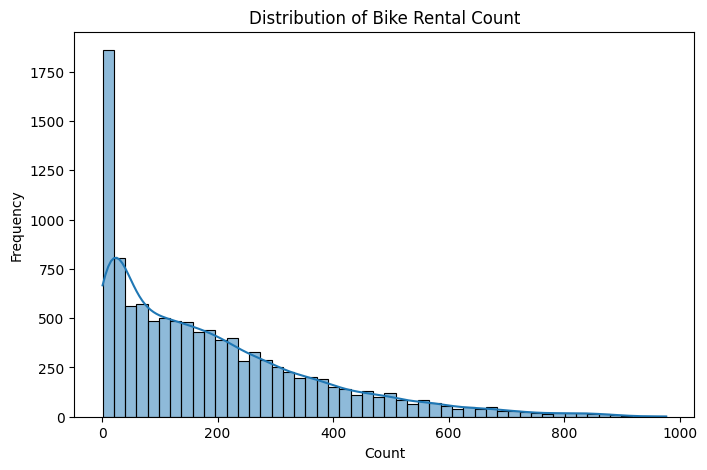

In [ ]:
# plotting the frequency of the sale and the total sales
plt.figure(figsize=(8,5))
sns.histplot(train_df['count'], bins=50, kde=True)
plt.title("Distribution of Bike Rental Count")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Feature Engineering (Datetime Split) for the model
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df['year'] = train_df['datetime'].dt.year


In [ ]:
# Drop columns not useful for linear regression:
train_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)


In [ ]:
# Feature–Target Split
X = train_df.drop('count', axis=1)
y = train_df['count']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (10886, 12)
Target shape: (10886,)


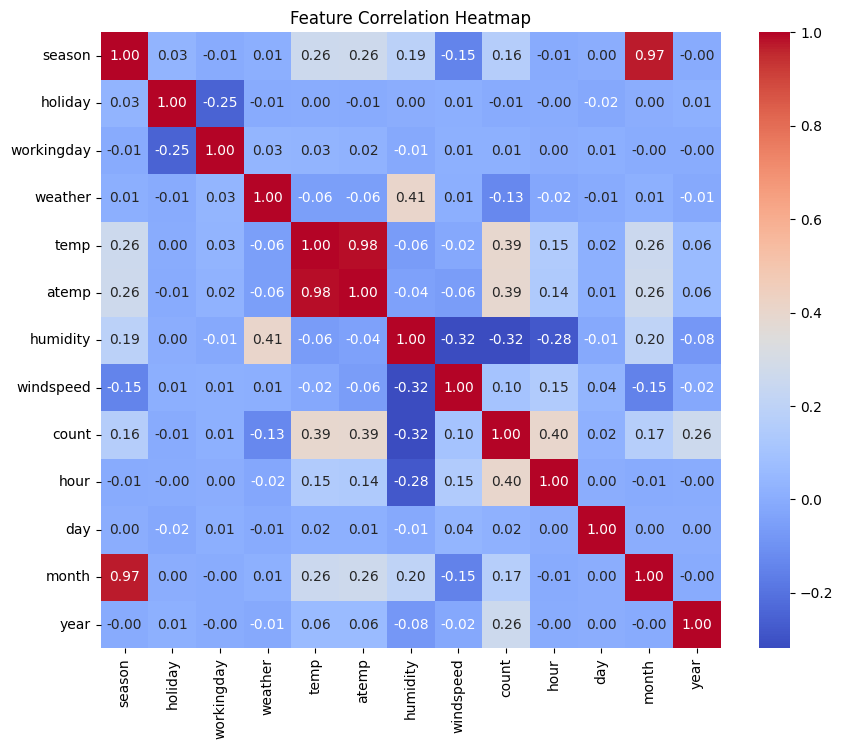

In [ ]:
# Correlation Heatmap (For Feature Understanding)
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Train–Validation–Test Split  >  Train + Temp vs Test (70% / 30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)


In [ ]:
# Train–Validation–Test Split  > Train + Temp vs Test (70% / 30%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)


In [ ]:
# Print Split Sizes
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Training set: (7620, 12)
Validation set: (1633, 12)
Test set: (1633, 12)


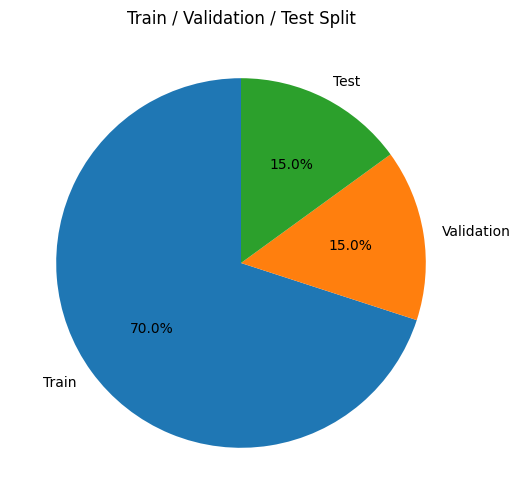

In [ ]:
# Visualizing Dataset Splits  for quick glance
labels = ['Train', 'Validation', 'Test']
sizes = [len(X_train), len(X_val), len(X_test)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Train / Validation / Test Split")
plt.show()


In [ ]:
# Feature Scaling (Standardization)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Print Scaled Feature Statistics for recheck
print("Scaled Training Mean (approx 0):")
print(X_train_scaled.mean(axis=0))

print("\nScaled Training Std (approx 1):")
print(X_train_scaled.std(axis=0))


Scaled Training Mean (approx 0):
[ 6.24755424e-17 -6.15430716e-17  1.09099081e-16 -7.11008971e-17
 -1.19356260e-16  2.57361936e-16  7.36651918e-17 -4.00962436e-17
  3.82313021e-17  1.24951085e-16 -6.06106008e-17 -2.03647889e-13]

Scaled Training Std (approx 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Linear Regression Model Training and fitting
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Check the Validation Performance
y_val_pred = lr_model.predict(X_val_scaled)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation MSE:", val_mse)
print("Validation R²:", val_r2)


Validation MSE: 19742.830400197137
Validation R²: 0.38294312200639236


In [ ]:
# Test Set Evaluation
y_test_pred = lr_model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test MSE:", test_mse)
print("Test R²:", test_r2)


Test MSE: 20166.45321879816
Test R²: 0.39046859825239555


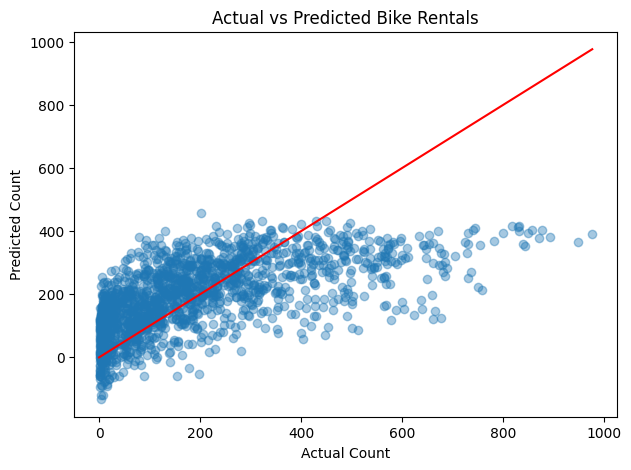

In [ ]:
# Actual vs Predicted Visualization
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red')
plt.show()


In [ ]:
# Model Coefficients Interpretation that is each feature contributions
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
8,hour,55.309164
5,atemp,44.887457
11,year,40.674299
10,month,31.027330
4,temp,6.232508
7,windspeed,4.558125
9,day,1.099007
2,workingday,0.984884
1,holiday,-1.185635
3,weather,-1.879827


# Coclusion
Linear Regression provides a simple and interpretable baseline model for demand prediction but is insufficient to fully capture the complex, non-linear relationships inherent in real-world bike rental behavior. Future improvements can be achieved by applying target transformation, regularization techniques, or more advanced non-linear models to enhance predictive performance.

In [ ]:
# For later use case
import os

MODEL_DIR = "easy"
os.makedirs(MODEL_DIR, exist_ok=True)


In [ ]:
import joblib

joblib.dump(lr_model, f"{MODEL_DIR}/linear_regression_model.pkl")
joblib.dump(scaler, f"{MODEL_DIR}/scaler.pkl")


['easy/scaler.pkl']

In [ ]:
import json

config = {
    "features": list(X.columns),
    "hour_bins": {
        "0-5": [0, 5],
        "6-11": [6, 11],
        "12-17": [12, 17],
        "18-23": [18, 23]
    }
}

with open(f"{MODEL_DIR}/config.json", "w") as f:
    json.dump(config, f, indent=4)
